<a href="https://colab.research.google.com/github/otavioaugusto1/AnaliseDeDadosCOVID-19/blob/master/An%C3%A1lise_de_dados_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link do repositório do GitHub que acessei para obter tais dados do WHO e Johns Hopkins: https://github.com/CSSEGISandData/COVID-19

In [ ]:
import pandas as pd

In [ ]:
confirmados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
mortes = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [ ]:
confirmados.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91,91,92,92,92,92,92,92,92,92,92,92,92,93,93,93,93,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,196543,201919,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638,370188,380292,392009,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007,500034,512293
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38841,39050,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936,43067,43270,43451,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845,44953,45152
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3784,3797,3809,3820,3832,3842,3851,3861,3875,3897,3915,3927,3936,3945,3950,3957,3959,3966,3971,3972,3981,3985,3988,3991,3997,4006,4019,4033,4040,4050,4063,4079,4091,4099,4104,4114,4118,4126,4135,4142


In [ ]:
confirmados.shape

(266, 236)

In [ ]:
confirmados['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Yukon', 'Anhui', 'Beijing', 'Chongqing', 'Fujian',
       'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Martinique', 'Mayotte',
       'New Caledonia', 'Reunion', 'Sai

In [ ]:
ultima_data = '9/6/20'
confirmados[ultima_data]

0      38398
1      10255
2      46364
3       1215
4       2965
       ...  
261    26127
262       10
263     1987
264    12776
265     6837
Name: 9/6/20, Length: 266, dtype: int64

In [ ]:
confirmados['Province/State'].sample(20)

236                             NaN
32                              NaN
45        Newfoundland and Labrador
33                              NaN
138                             NaN
110                             NaN
246                        Anguilla
195                             NaN
172                             NaN
3                               NaN
169                             NaN
128                             NaN
247                         Bermuda
8      Australian Capital Territory
70                            Hunan
115                             NaN
251     Falkland Islands (Malvinas)
127                             NaN
183                             NaN
104                             NaN
Name: Province/State, dtype: object

## Como podemos ver, algumas provincias e estados não estão preenchidos(NaN), ou seja, nossos dados estão 'sujos'. Portanto, deveremos pensar em alguma maneira para solucionar isso.

In [ ]:
# Não vou considerar essa análise, pois existem muitos campos vazios.
# Muita disparidade no padrão.
confirmados['Country/Region'].value_counts()

China                33
Canada               14
France               11
United Kingdom       11
Australia             8
                     ..
Korea, South          1
Equatorial Guinea     1
Russia                1
Czechia               1
Thailand              1
Name: Country/Region, Length: 188, dtype: int64

In [ ]:
# Melhor ver os casos.

In [ ]:
confirmados_por_pais = confirmados.groupby('Country/Region').sum()
confirmados_por_pais.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91,91,92,92,92,92,92,92,92,92,92,92,92,93,93,93,93,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,196543,201919,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574,276072,282437,289100,294569,299126,305966,312659,320884,329043,336802,342154,350867,359638,370188,380292,392009,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007,500034,512293
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38841,39050,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794,41023,41299,41495,41663,41701,41846,42056,42319,42477,42616,42792,42825,42936,43067,43270,43451,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845,44953,45152
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,...,17895,18318,18730,19445,19890,20272,20698,21084,21397,21713,22127,22358,22742,23035,23287,23558,23773,23989,24236,24407,24602,24811,24915,25053,25204,25322,25448,25547,25670,25746,25819,25923,26049,26136,26207,26278,26321,26373,26465,26524


In [ ]:
# Observar a china, pesquisando pela linha a partir do índice 2, pois o 0 e o 1 são latitude e longitude.
confirmados_por_pais.loc['China'][2:]

1/22/20      548.0
1/23/20      643.0
1/24/20      920.0
1/25/20     1406.0
1/26/20     2075.0
            ...   
9/5/20     90025.0
9/6/20     90058.0
9/7/20     90078.0
9/8/20     90087.0
9/9/20     90100.0
Name: China, Length: 232, dtype: float64

Text(0.5, 1.0, 'Casos confirmados  na China')

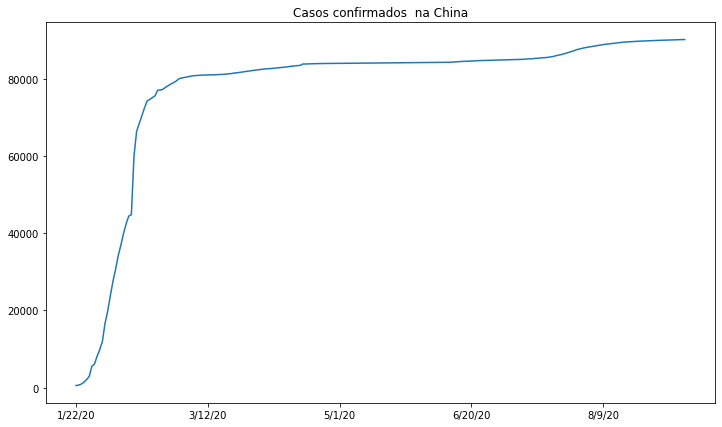

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))

confirmados_por_pais.loc['China'][2:].plot()
plt.title("Casos confirmados  na China")

# Visualizar dados pode ser feito de diversas maneiras. Dependendo de como mostrar o tamanho da figure no plt, poderá confundir e pensar que o crescimento foi extremamente rápido, como mostra a figura abaixo definindando a largura em tamanho 2.

Text(0.5, 1.0, 'Casos confirmados  na China')

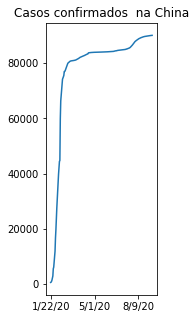

In [ ]:
plt.figure(figsize=(2,5))

confirmados_por_pais.loc['China'][2:].plot()
plt.title("Casos confirmados  na China")

# Olhando quantos de novos casos surgem por dia na China.

In [ ]:
novos_casos_china=confirmados_por_pais.loc['China'][2:].diff().dropna()
novos_casos_china

1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
1/27/20    802.0
           ...  
9/5/20      17.0
9/6/20      33.0
9/7/20      20.0
9/8/20       9.0
9/9/20      13.0
Name: China, Length: 231, dtype: float64

Text(0.5, 1.0, 'Casos novos China')

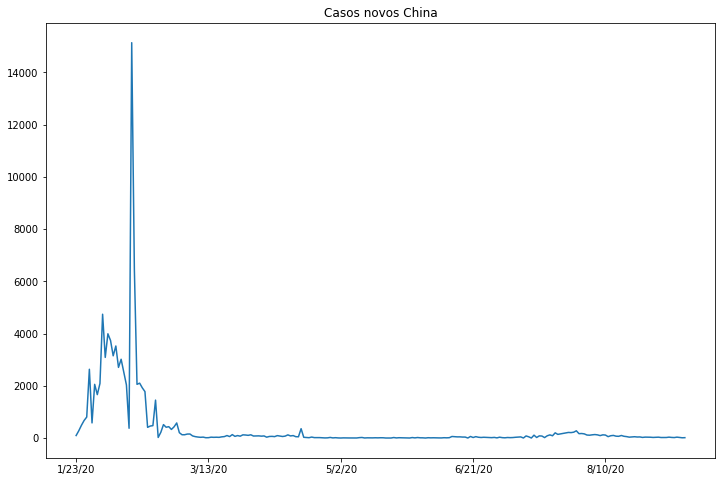

In [ ]:
plt.figure(figsize=(12,8))
novos_casos_china.plot()
plt.title("Casos novos China")


# Peguei o último dia atualizado de todos os países desse dataFrame (06/ 09/2020 ) e irei plotar.

Text(0.5, 1.0, 'Confirmados por país')

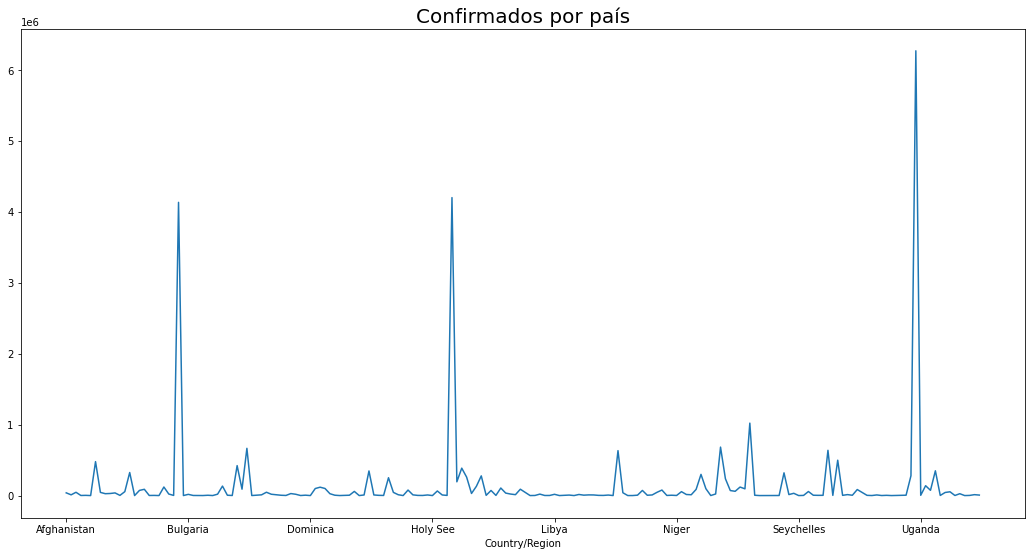

In [ ]:
plt.figure(figsize=(18,9))
confirmados_por_pais[ultima_data].plot()
plt.title("Confirmados por país",fontsize = 20)

## Como pode-se notar, plotar quando o índice é uma categoria, ou seja, o país não dará certo, pois no eixo X mostrará resultados sem podermos ver realmente qual país seja. Caso fosse uma data, o plot seria mais bem visto.

# Recomenda-se então o gráfico de barras

Text(0.5, 1.0, 'Confirmados por país top 10')

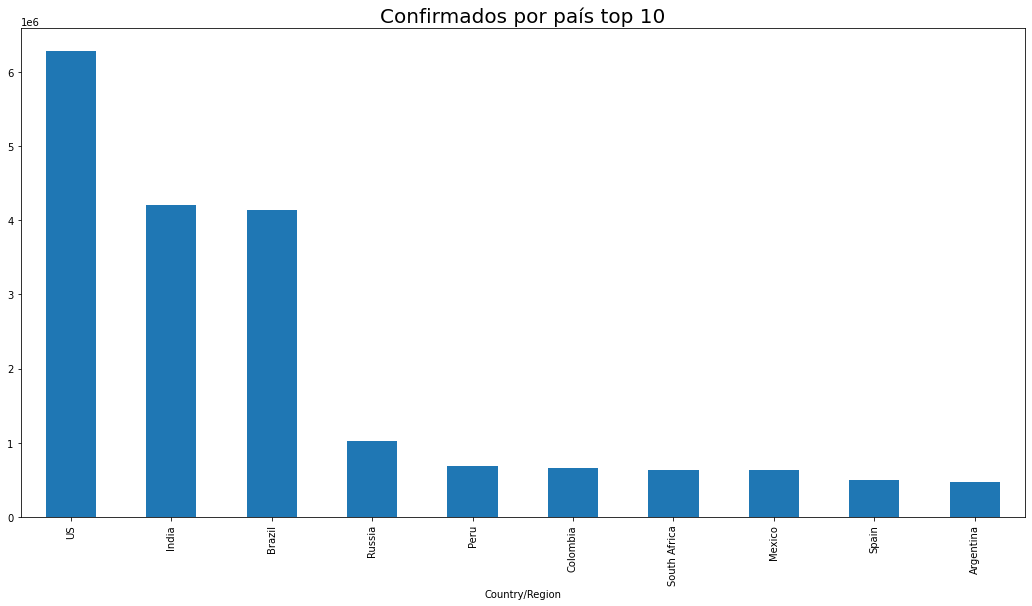

In [ ]:
plt.figure(figsize=(18,9))
confirmados_por_pais[ultima_data].sort_values(ascending= False )[:10].plot(kind= 'bar')
plt.title("Confirmados por país top 10",fontsize = 20)

## Desconsiderando os 4 primeiros por possuírem tamanhos assustadores e atrapalhando a visualização do restante.

Text(0.5, 1.0, 'Confirmados por país da 4º a 10º posição.')

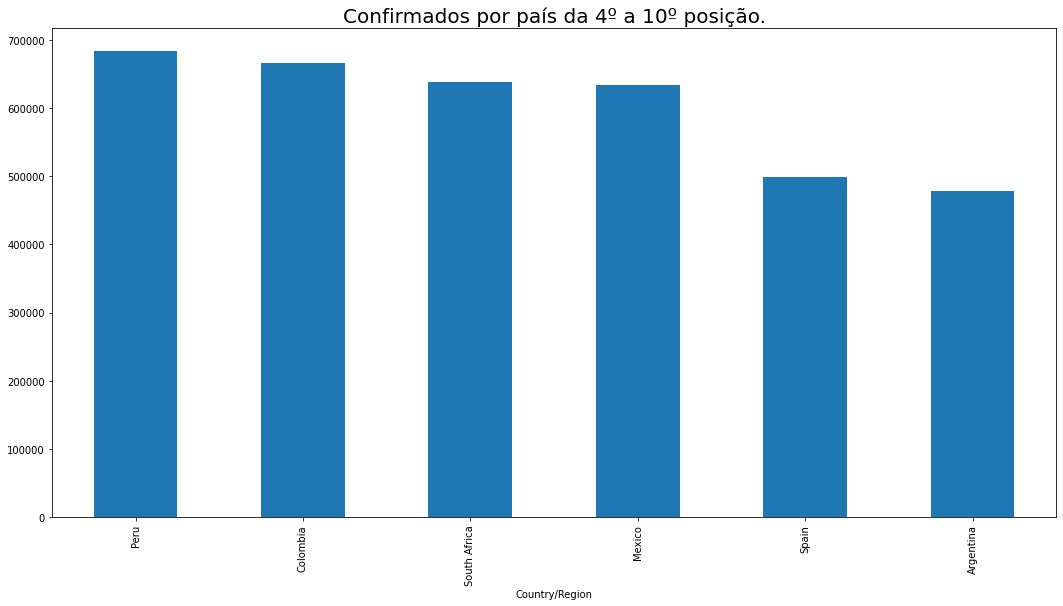

In [ ]:
plt.figure(figsize=(18,9))
confirmados_por_pais[ultima_data].sort_values(ascending= False )[4:10].plot(kind= 'bar')
plt.title("Confirmados por país da 4º a 10º posição.",fontsize = 20)

In [ ]:
display(mortes.head())
display(recuperados.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52,52,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,54,55,58,59,62,64,67,70,75,78,80,80,80,86,86,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120,124,126


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627,26004,26308,26644,27017,27347,27653,27971,28281,28587,28874,29142,29369,29587,29886,30157,30436,30717,30978,31244,31493,31746,32006,32259,32481,32745,32985,33183,33379
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,807,807,821,825,825,828,839,839,839,839,839,855,858,863,863,863,869,869,875,875,875,875,875,877,877,893,893,902,902,902,908,908,909,909,928,928,928,934,934,938
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,460,461,476,503,506,520,544,564,567,569,575,577,577,584,628,628,632,667,698,742,804,814,818,877,977,977,1335,1028,1041,1063,1071,1084,1115,1144,1167,1192,1198,1215,1215,1245


In [ ]:
def ultimo_por_pais(dados):
  return dados.groupby("Country/Region").sum().iloc[:,-1]

# Concatenando os 3 DF´s

In [ ]:
informacao = [ultimo_por_pais(confirmados),ultimo_por_pais(mortes),ultimo_por_pais(recuperados)]
combinado =pd.concat(informacao,axis = 1)
combinado.columns= ['Confirmados','Mortes',"Recuperados"]
combinado

,Confirmados,Mortes,Recuperados
Country/Region,,,
Afghanistan,38544,1420,31048
Albania,10704,322,6284
Algeria,47216,1581,33379
Andorra,1301,53,938
Angola,3092,126,1245
...,...,...,...
West Bank and Gaza,27919,192,18466
Western Sahara,10,1,8
Yemen,1999,576,1209


# Observando a taxa de letalidade

In [ ]:
combinado.sum()

Confirmados    27863733
Mortes           903686
Recuperados    18776723
dtype: int64

In [ ]:
resumo = combinado.sum()
taxa_letalidade1 = resumo['Mortes'] / resumo ['Confirmados']
print(taxa_letalidade1 * 100)

3.2432337763213566


## Não podemos se animar ou entristecer com tais números. Aqui, com os dados disponibilizados, aponta que dos mais de 2 milhões de CONFIRMADOS, um pouco mais de 3% morreram. Tal taxa poderá aumentar, pois desses já CONFIRMADOS ainda podem vir a óbito, podem surgir mais confirmados e, com isso, mais óbitos, assim como também podem diminuir a força do 'vírus' e, com isso, menos pessoas acharem estar com o covid-19, não ir ao médico, não fazer exame e, portanto, a taxa de confirmados e mortes diminuírem.

## Resumos são difíceis, mas são importantes.

In [ ]:
letalidade = combinado['Mortes'] / combinado['Confirmados'] * 100
combinado['Letalidade'] = letalidade
letalidade2 = combinado['Mortes'] / (combinado['Recuperados'] + combinado['Mortes']) * 100
combinado['letalidade2'] = letalidade2
combinado.head(10)
combinado.sort_values("Letalidade",ascending=False)
somatorio = combinado.sum()
taxa_letalidade_att = somatorio['Mortes'] / somatorio['Confirmados']
print(taxa_letalidade_att * 100)

3.2432337763213566


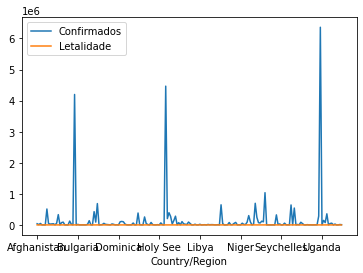

In [ ]:
# Visualização horrenda
combinado[['Confirmados','Letalidade']].plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


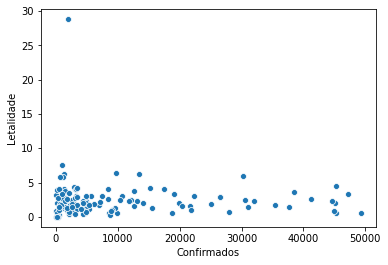

In [ ]:
import seaborn as sns

sns.scatterplot(data = combinado.query('Confirmados > 40 and Confirmados < 50000'),x = 'Confirmados',y='Letalidade')

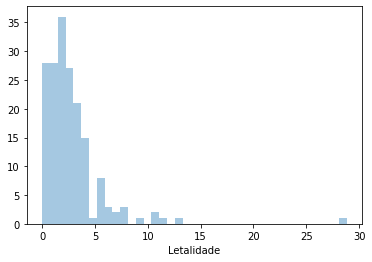

In [ ]:
sns.distplot(combinado.query("Confirmados > 40")['Letalidade'],kde=False)

# Segunda parte

In [ ]:
# Separando a China
# loc obtém através do nome de alguma linha ou coluna
# iloc obtém através do índice da coluna: '0','1'...
#confirmados.head()
#confirmados.set_index('Country/Region').loc['China']

## Como será mostrado, a 'soberania' da China sobre o covid-19 já era. China inicialmente era pelo menos 5 vezes maior que o restante do mundo nos meses iniciais, porém agora quando a doença se espalhou e, muito provável, que a China tenha 'cuidado' com a transmissão, mostra que o índice está bastante pequeno.

Text(0.5, 1.0, 'China em relação aos outros países')

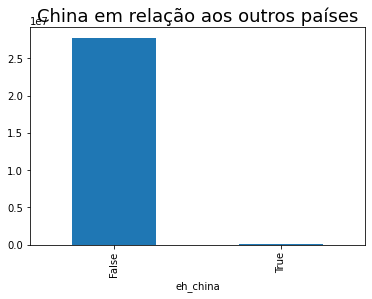

In [ ]:
eh_china = confirmados['Country/Region'] == 'China'
eh_china
confirmados['eh_china'] = eh_china
confirmados.head(10)
confirmados.groupby('eh_china').sum()['9/9/20'].plot(kind='bar')
plt.title("China em relação aos outros países",fontsize= 18)

## Como anda o crescimento? Irei mostrar...

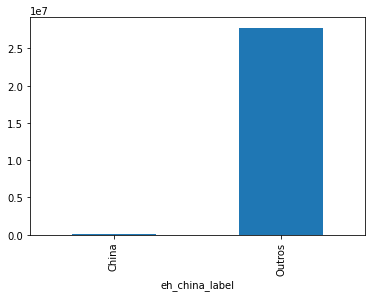

In [ ]:
import numpy as np 
confirmados['eh_china_label'] = np.where(confirmados['eh_china'],'China','Outros')
confirmados['eh_china_label'].value_counts()
confirmados.groupby('eh_china_label').sum()['9/9/20'].plot(kind='bar')


Text(0.5, 1.0, 'Novos casos confirmadosem 9/9/20')

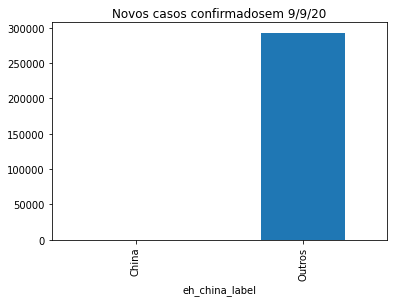

In [ ]:
last_date = '9/9/20'
somados = confirmados.groupby('eh_china_label').sum()
somados['delta'] = somados['9/9/20'] - somados['9/8/20']
somados['delta'].plot(kind='bar')
plt.title(f"Novos casos confirmadosem {last_date}")

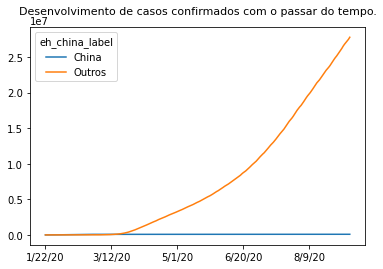

In [ ]:
somados.T[2:-2].plot()
plt.title("Desenvolvimento de casos confirmados com o passar do tempo.",pad=13,fontsize= 11)
plt.show()

### Hummmm, olha o crescimento da China no último dia (09/08/2020) até o momento que estou fazendo essa análise comparando o dia anterior (08/09/2020) comparando ainda com o resto do mundo.

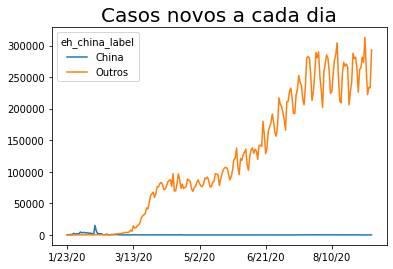

In [ ]:
diferenca =somados.T[2:-2].diff().dropna()
diferenca.plot()
plt.title("Casos novos a cada dia",fontsize = 20)
plt.show()